# [COVID-19] - Data visualization and Analysis.

Covid-19, also known as coronavirus, is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). It was primally identified in December 2019 in Wuhan, China and has spread globally, resulting in an ongoing pandemic (Wikipedia). This notebook shows the impact caused by covid around the world and brings a brief study in Brazil.


---

#### Last time executed:

In [1]:
import datetime as dt
print(dt.datetime.now())

2020-05-24 20:15:46.134661


#### Libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

#### Data obtained from Johns Hopkins University.<br> 
Source: https://github.com/CSSEGISandData/COVID-19

In [3]:
df_confirmed_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/C" +
                                 "OVID-19/master/csse_covid_19_data/csse_covid_19_ti" +
                                 "me_series/time_series_covid19_confirmed_global.csv")
df_recovered_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVI" +
                                 "D-19/master/csse_covid_19_data/csse_covid_19_time_ser" +
                                 "ies/time_series_covid19_recovered_global.csv")
df_death_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/" +
                             "master/csse_covid_19_data/csse_covid_19_time_series/time_s" +
                             "eries_covid19_deaths_global.csv")

In [4]:
df_confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,898,916,933,946,948,949,964,969,981,989
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,761,761,761,761,761,761,762,762,762,762
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,48,48,48,48,50,52,52,58,60,61


In [5]:
df_recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,691,745,745,778,801,850,930,938,996,1040
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,694,705,714,715,727,742,758,771,777,783
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3158,3271,3409,3507,3625,3746,3968,4062,4256,4426
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,596,604,615,617,624,628,639,639,652,653
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,14,17,17,17,17,17,17,17,17,18


In [6]:
df_death_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,136,153,168,169,173,178,187,193,205,216
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,31,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,529,536,542,548,555,561,568,575,582,592
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,49,49,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,3,3,3,3,3,4


In [7]:
start_date = '1/22/20'
# Needed because of daily updates on database which cannot be updated yet
# where the date of "today" has not been updated.
# So, for practicity, we get one day before. We could get the last column as well.
# end_date = (dt.datetime.today() - dt.timedelta(days=1)).strftime('%-m/%d/%y')
end_date = df_confirmed_cases.columns[-1]

In [8]:
df_top10 = df_confirmed_cases.groupby(['Country/Region']).sum()
df_top10 = df_top10.loc[:, start_date:end_date]
df_top10 = df_top10.sort_values(by=[end_date]).tail(10)

In [9]:
df_top10

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Iran,0,0,0,0,0,0,0,0,0,0,...,114533,116635,118392,120198,122492,124603,126949,129341,131652,133521
Turkey,0,0,0,0,0,0,0,0,0,0,...,144749,146457,148067,149435,150593,151615,152587,153548,154500,155686
Germany,0,0,0,0,0,1,4,4,4,5,...,174478,175233,175752,176369,176551,177778,178473,179021,179710,179986
France,0,0,2,3,3,3,4,5,5,5,...,178994,179630,179630,179693,180051,180933,181700,181951,182015,182036
Italy,0,0,0,0,0,0,0,0,0,2,...,223096,223885,224760,225435,225886,226699,227364,228006,228658,229327
Spain,0,0,0,0,0,0,0,0,0,0,...,229540,230183,230698,230698,231606,232037,232555,233037,234824,235290
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,234440,238004,241461,244995,247709,250138,249619,252246,255544,258504
Russia,0,0,0,0,0,0,0,0,0,2,...,252245,262843,272043,281752,290678,299941,308705,317554,326448,335882
Brazil,0,0,0,0,0,0,0,0,0,0,...,203165,220291,233511,241080,255368,271885,291579,310087,330890,347398


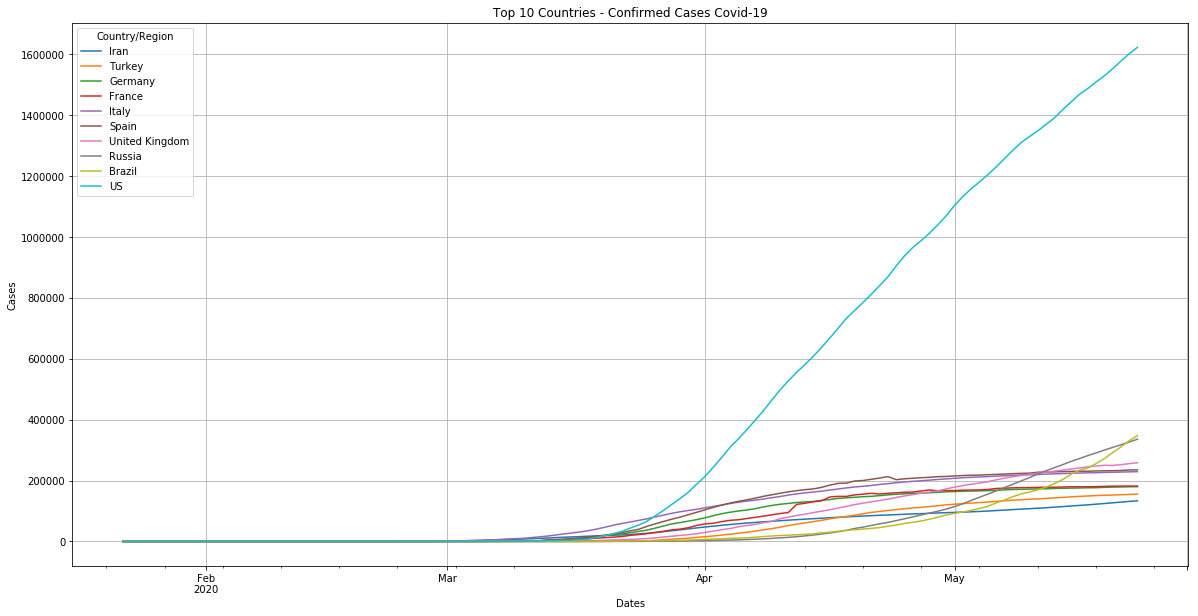

In [10]:
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(1,1,1)
df_top10 = df_top10.T
df_top10.index = pd.to_datetime(df_top10.index)
df_top10.plot(ax=ax, legend=True)
ax.set_title("Top 10 Countries - Confirmed Cases Covid-19", fontsize=12)
ax.grid(True)
ax.set(xlabel='Dates', ylabel="Cases");

Extracting data about recovered cases from Top 10 Countries Confimed Cases by name.

In [11]:
top10_countries = df_top10.columns.tolist() # Name of countries inside top 10
# Searching recovered cases with the top10 countries name.
df_recovered = df_recovered_cases.loc[df_recovered_cases['Country/Region'].isin(top10_countries)]
df_recovered = df_recovered.groupby(['Country/Region']).sum()
df_recovered = df_recovered.loc[:, start_date:end_date]
df_recovered = df_recovered.sort_values(by=[end_date]).tail(10)

In [12]:
df_recovered

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
United Kingdom,0,0,0,0,0,0,0,0,0,0,...,1043,1047,1058,1058,1090,1099,1116,1134,1142,1149
France,0,0,0,0,0,0,0,0,0,0,...,59719,60562,60562,61327,61843,62678,63472,63976,63986,63988
Iran,0,0,0,0,0,0,0,0,0,0,...,90539,91836,93147,94464,95661,97173,98808,100564,102276,104072
Russia,0,0,0,0,0,0,0,0,0,0,...,53530,58226,63166,67373,70209,76130,85392,92681,99825,107936
Turkey,0,0,0,0,0,0,0,0,0,0,...,104030,106133,108137,109962,111577,112895,113987,114990,116111,117602
Italy,0,0,0,0,0,0,0,0,0,0,...,115288,120205,122810,125176,127326,129401,132282,134560,136720,138840
Brazil,0,0,0,0,0,0,0,0,0,0,...,79479,84970,89672,94122,100459,106794,116683,125960,135430,142587
Spain,0,0,0,0,0,0,0,0,0,0,...,143374,144783,146446,146446,150376,150376,150376,150376,150376,150376
Germany,0,0,0,0,0,0,0,0,0,0,...,150300,151597,152600,154011,155041,155681,156966,158087,159064,159716


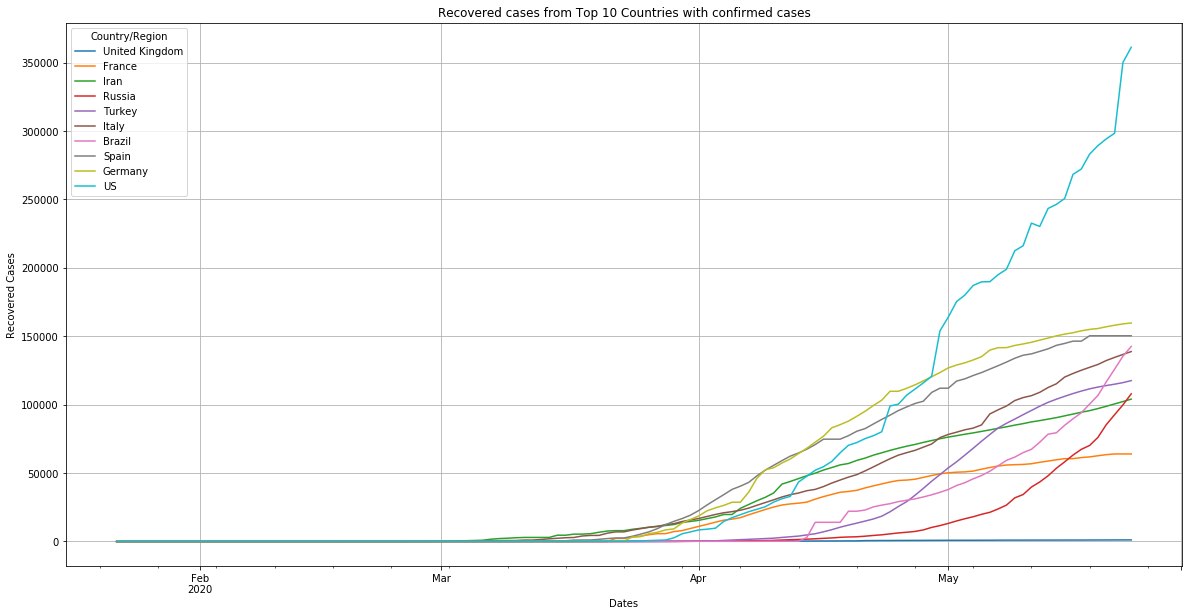

In [13]:
fig = plt.figure(figsize = (20, 10))
ax_2 = fig.add_subplot(1,1,1)
df_recovered = df_recovered.T
df_recovered.index = pd.to_datetime(df_recovered.index)
df_recovered.plot(ax=ax_2, legend=True)
ax_2.set_title("Recovered cases from Top 10 Countries with confirmed cases", fontsize=12)
ax_2.grid(True)
ax_2.set(xlabel='Dates', ylabel='Recovered Cases');

In [14]:
df_death = df_death_cases.loc[df_death_cases['Country/Region'].isin(top10_countries)]
df_death = df_death.groupby(['Country/Region']).sum()
df_death = df_death.loc[:, start_date:end_date]
df_death = df_death.sort_values(by=[end_date]).tail(10)

In [15]:
df_death

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Russia,0,0,0,0,0,0,0,0,0,0,...,2305,2418,2537,2631,2722,2837,2972,3099,3249,3388
Turkey,0,0,0,0,0,0,0,0,0,0,...,4007,4055,4096,4140,4171,4199,4222,4249,4276,4308
Iran,0,0,0,0,0,0,0,0,0,0,...,6854,6902,6937,6988,7057,7119,7183,7249,7300,7359
Germany,0,0,0,0,0,0,0,0,0,0,...,7884,7897,7938,7962,8003,8081,8144,8203,8228,8261
Brazil,0,0,0,0,0,0,0,0,0,0,...,13999,14962,15662,16118,16853,17983,18859,20047,21048,22013
France,0,0,0,0,0,0,0,0,0,0,...,27428,27532,27532,28111,28242,28025,28135,28218,28218,28218
Spain,0,0,0,0,0,0,0,0,0,0,...,27321,27459,27563,27563,27709,27778,27888,27940,28628,28678
Italy,0,0,0,0,0,0,0,0,0,0,...,31368,31610,31763,31908,32007,32169,32330,32486,32616,32735
United Kingdom,0,0,0,0,0,0,0,0,0,0,...,33693,34078,34546,34716,34876,35422,35786,36124,36475,36757


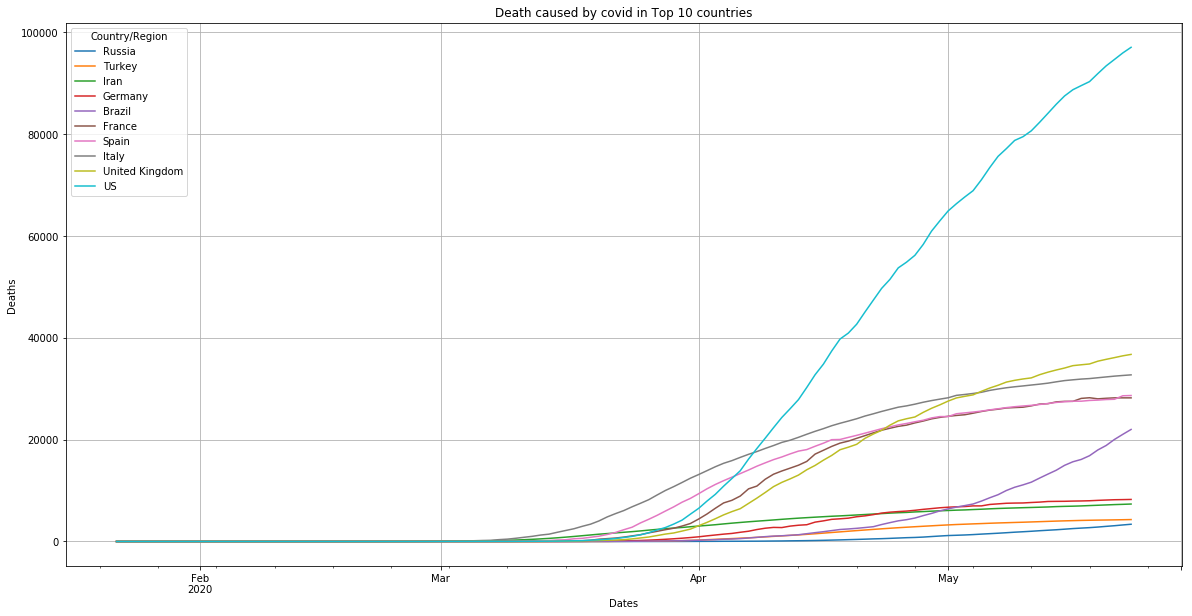

In [16]:
fig = plt.figure(figsize = (20, 10))
ax_4 = fig.add_subplot(1,1,1)
df_death = df_death.T
df_death.index = pd.to_datetime(df_death.index)
df_death.plot(ax=ax_4, legend=True)
ax_4.set_title("Death caused by covid in Top 10 countries", fontsize=12)
ax_4.grid(True)
ax_4.set(xlabel='Dates', ylabel='Deaths');

Active cases = Confirmed - Recovered - Deaths

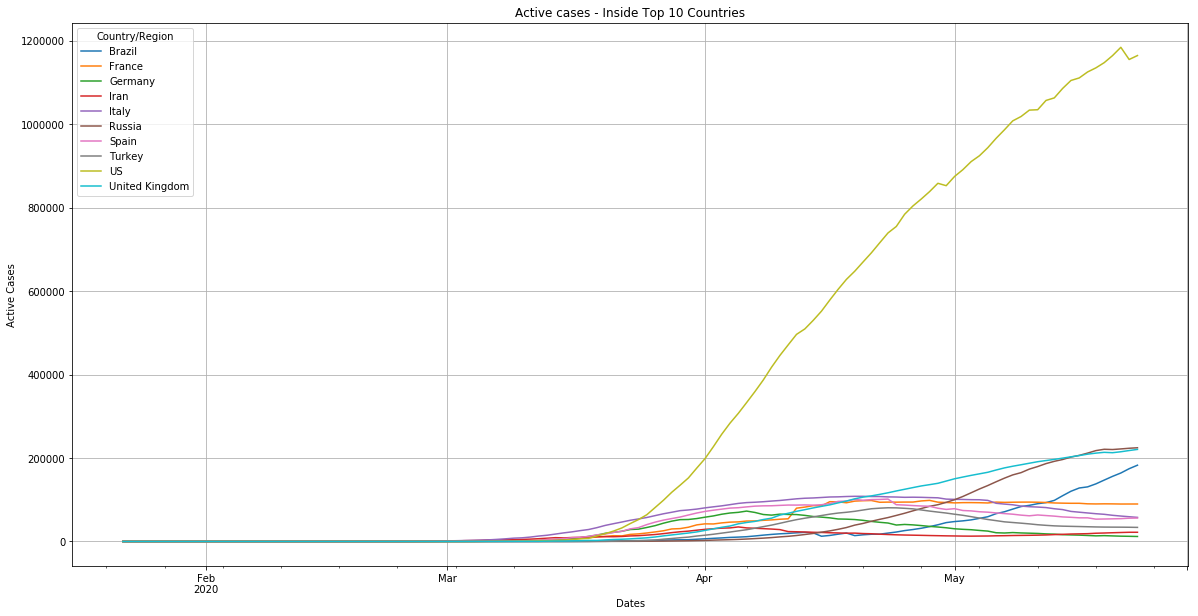

In [17]:
fig = plt.figure(figsize = (20, 10))
ax_5 = fig.add_subplot(1,1,1)
df_active = df_top10 - df_recovered - df_death
df_active.plot(ax=ax_5, legend=True)
ax_5.set_title("Active cases - Inside Top 10 Countries", fontsize=12)
ax_5.grid(True)
ax_5.set(xlabel='Dates', ylabel='Active Cases');

## Brazil case study


In [18]:
df_brazil_confirmed = df_confirmed_cases.loc[df_confirmed_cases['Country/Region'].isin(['Brazil'])]
df_brazil_recovered = df_recovered_cases.loc[df_recovered_cases['Country/Region'].isin(['Brazil'])]
df_brazil_deaths = df_death_cases.loc[df_death_cases['Country/Region'].isin(['Brazil'])]

In [19]:
df_brazil_confirmed = df_brazil_confirmed.loc[:,start_date:end_date].T
df_brazil_confirmed.index = pd.to_datetime(df_brazil_confirmed.index)
df_brazil_confirmed.columns = ['Cases']

df_brazil_recovered = df_brazil_recovered.loc[:,start_date:end_date].T
df_brazil_recovered.index = pd.to_datetime(df_brazil_recovered.index)
df_brazil_recovered.columns = ['Cases']

df_brazil_deaths = df_brazil_deaths.loc[:,start_date:end_date].T
df_brazil_deaths.index = pd.to_datetime(df_brazil_deaths.index)
df_brazil_deaths.columns = ['Cases']

df_brazil_active = df_brazil_confirmed - df_brazil_recovered - df_brazil_deaths

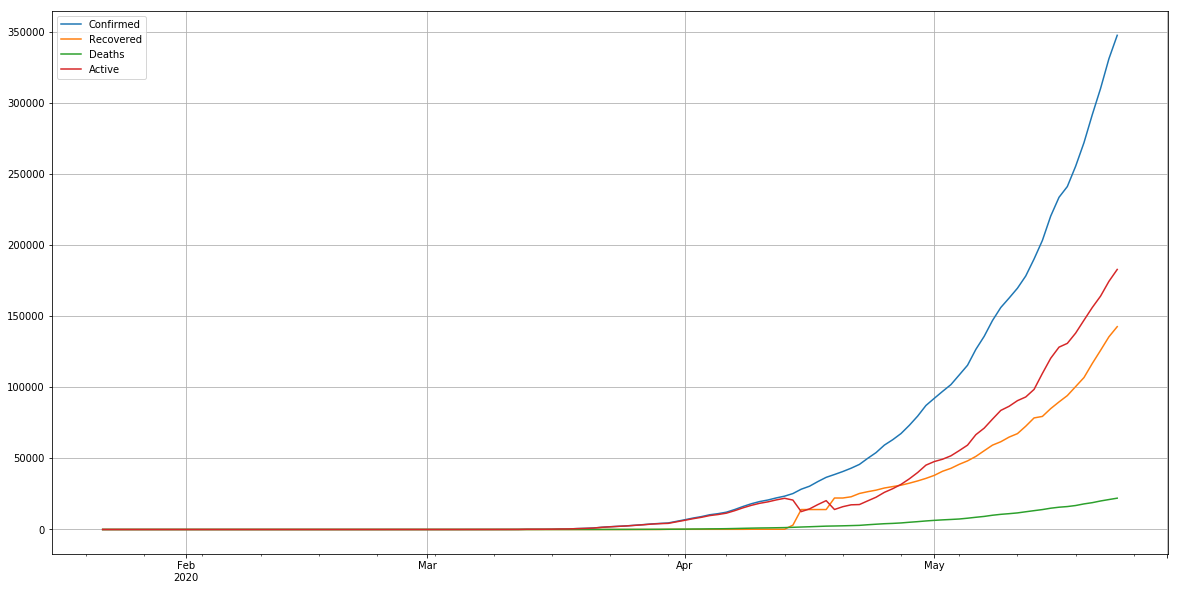

In [20]:
fig = plt.figure(figsize = (20, 10))
ax_6 = fig.add_subplot(1,1,1)
legend_name = ['Confirmed', 'Recovered', 'Deaths', 'Active']
df_brazil_confirmed.plot(ax=ax_6, legend=True)
df_brazil_recovered.plot(ax=ax_6, legend=True)
df_brazil_deaths.plot(ax=ax_6, legend=True)
df_brazil_active.plot(ax=ax_6, legend=True)
ax_6.legend(legend_name)
ax_6.grid(True)

In [21]:
### Data about last 24 hours

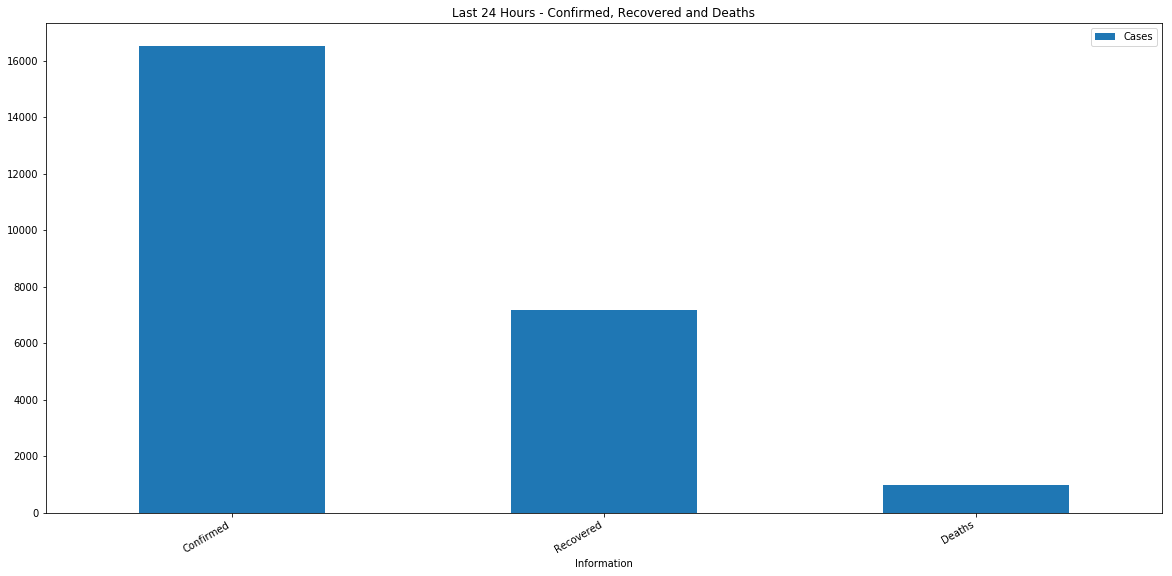

In [22]:
confirmed_daily = df_brazil_confirmed.iloc[-1,0] - df_brazil_confirmed.iloc[-2,0]
recovered_daily = df_brazil_recovered.iloc[-1,0] - df_brazil_recovered.iloc[-2,0]
deaths_daily = df_brazil_deaths.iloc[-1,0] - df_brazil_deaths.iloc[-2,0]
data = {'Information':['Confirmed', 'Recovered', 'Deaths'], 'Cases':[confirmed_daily, recovered_daily, deaths_daily]}
df_last24hours = pd.DataFrame(data)
fig = plt.figure(figsize = (20, 10))
ax_7 = fig.add_subplot(1,1,1)
df_last24hours.plot.bar(ax=ax_7, x='Information')
ax_7.set_title("Last 24 Hours - Confirmed, Recovered and Deaths",fontsize=12)
fig.autofmt_xdate()

In [23]:
### Growth rate by week in Brazil

In [46]:
df_growth_confirmed = df_brazil_confirmed.pct_change(axis='index', periods=7)
df_growth_recovered = df_brazil_recovered.pct_change(axis='index', periods=7)
df_growth_deaths = df_brazil_deaths.pct_change(axis='index', periods=7)

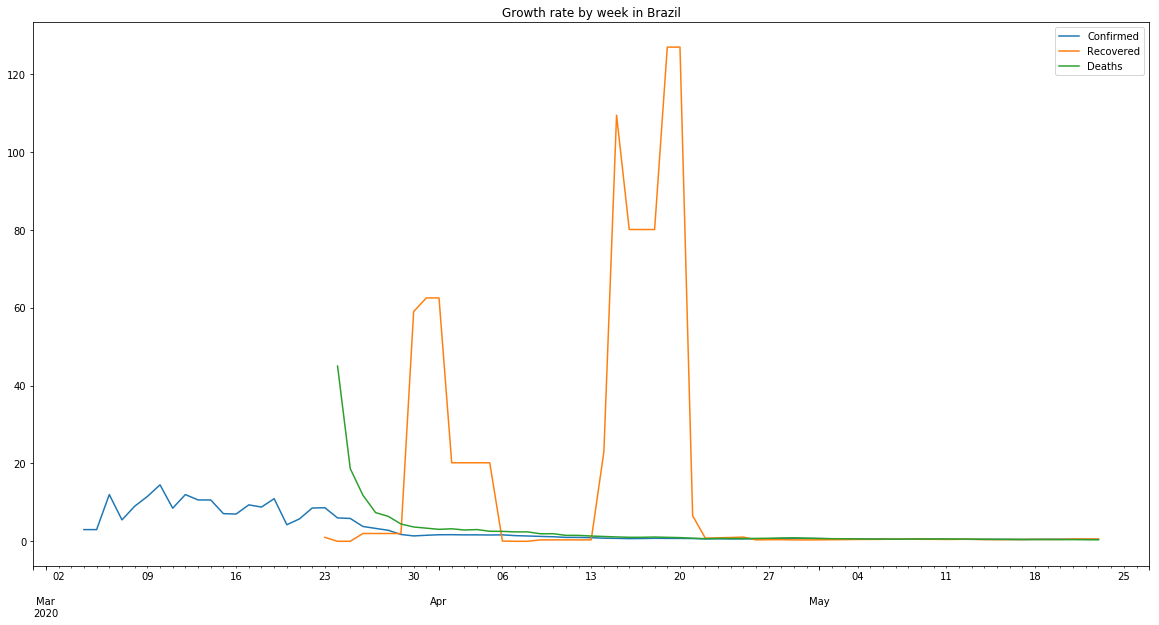

In [50]:
fig = plt.figure(figsize = (20, 10))
ax_8 = fig.add_subplot(1,1,1)
df_names = ['Confirmed', 'Recovered', 'Deaths']
df_growth_confirmed.plot(ax=ax_8, legend=True)
df_growth_recovered.plot(ax=ax_8, legend=True)
df_growth_deaths.plot(ax=ax_8, legend=True)
ax_8.set_title('Growth rate by week in Brazil', fontsize=12)
ax_8.legend(df_names);